# Airbnb price prediction
- Machine Learning Project

## Data load

In [690]:
# 라이브러리 
import pandas as pd

In [691]:
# 데이터 불러오기
df = pd.read_csv('/Users/yangdong-yeong/Downloads/archive (2)/AB_NYC_2019.csv')


In [692]:
# feature engineering 후 비교를 위해 baseline 생성
baseline = df.copy()

In [693]:
# 데이터 크기
df.shape

(48895, 16)

In [694]:
# 데이터 샘플 확인

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## EDA & Feature engineering

In [695]:
# 데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [696]:
# 결측치 확인
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**review**

가설 : 리뷰가 많거나 최신이다 = 인기가 있다 = 가격이 저렴하다? <br/>
last_review를 가장 최신일로부터 count하는 형태로 변환

In [697]:
# last_review 열을 날짜 형식으로 변환 (NaT를 처리하기 위해 coerce 사용)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# 가장 최신 리뷰 날짜 찾기
latest_review_date = df['last_review'].max()

# 가장 최신 일로부터 몇 일이 지났는지 계산
df['days_since_last_review'] = (latest_review_date - df['last_review']).dt.days

# 'days_since_last_review' 열의 중앙값 계산
median_days_since_last_review = df['days_since_last_review'].median()

# 결측값을 중앙값으로 채우기
df['days_since_last_review'].fillna(median_days_since_last_review, inplace=True)

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_20387/4049536693.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_last_review'].fillna(median_days_since_last_review, inplace=True)


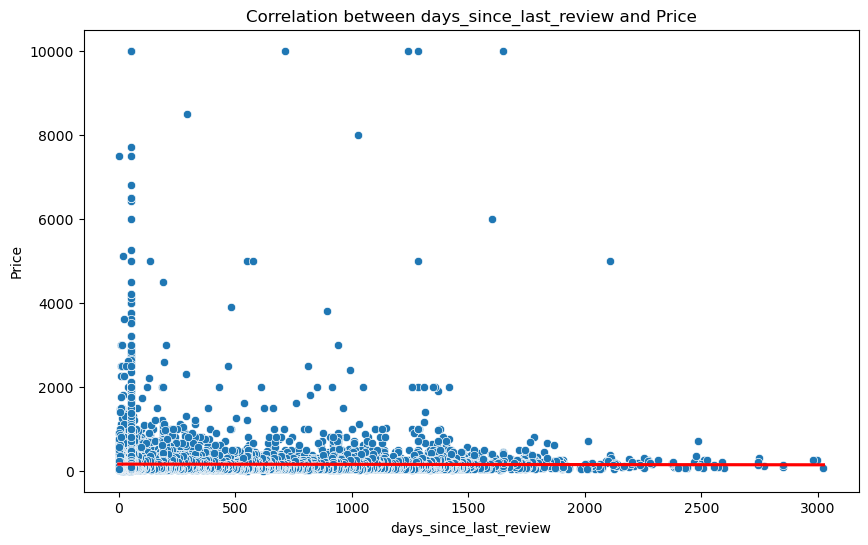

In [698]:
# days_since_last_review와 price의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_since_last_review', y='price', data=df)
sns.regplot(x='days_since_last_review', y='price', data=df, scatter=False, color='red')

plt.title('Correlation between days_since_last_review and Price')
plt.xlabel('days_since_last_review')
plt.ylabel('Price')
plt.show()

In [699]:
# 'name_length'와 'price' 사이의 상관 계수 계산
correlation = df[['days_since_last_review', 'price']].corr()
print(correlation)

                        days_since_last_review     price
days_since_last_review                1.000000 -0.008617
price                                -0.008617  1.000000


graph와 correalation으로 확인하였을 때 가격과는 상관이 없는 것으로 보여짐

In [700]:
# reviews_per_month '0'으로 결측치 채우기
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

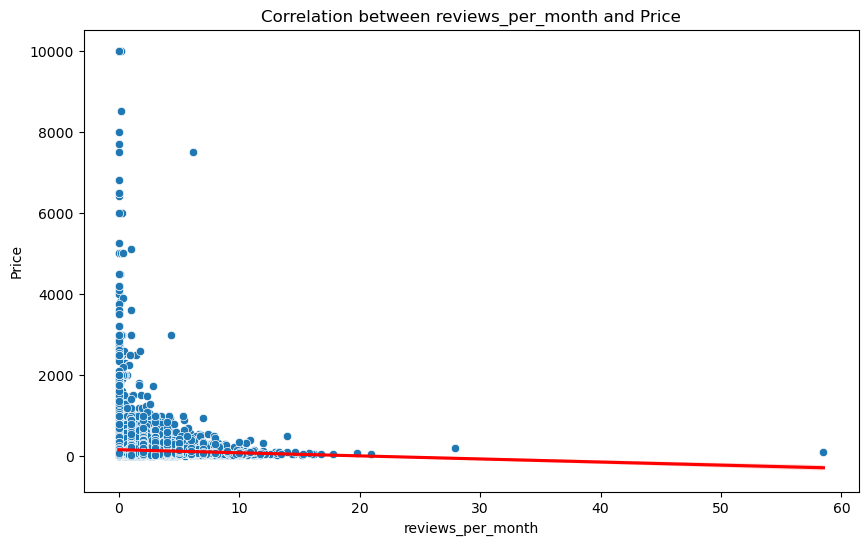

In [701]:
# reviews_per_month와 price의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price', data=df)
sns.regplot(x='reviews_per_month', y='price', data=df, scatter=False, color='red')

plt.title('Correlation between reviews_per_month and Price')
plt.xlabel('reviews_per_month')
plt.ylabel('Price')
plt.show()

In [702]:
# 'name_length'와 'price' 사이의 상관 계수 계산
correlation = df[['reviews_per_month', 'price']].corr()
print(correlation)

                   reviews_per_month     price
reviews_per_month           1.000000 -0.050564
price                      -0.050564  1.000000


리뷰의 개수와는 미세한 음의 상관관계가 있지만 큰 영향은 없는 것으로 보여짐

<Axes: >

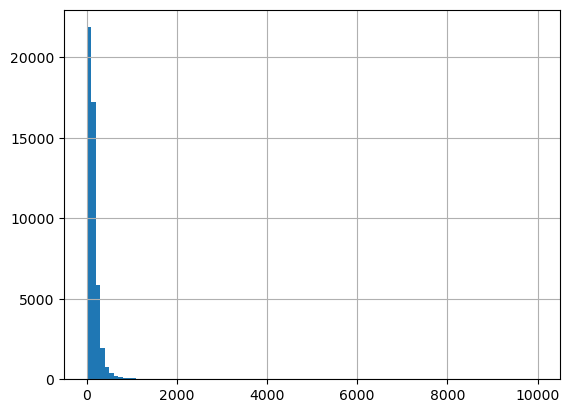

In [703]:
#target(hist)
df['price'].hist(bins=100)

In [704]:
# target(describe)
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

**room_type**

In [705]:
# room_type 종류 확인
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

집 전체 > 개인 룸 > 공유 룸 순서 등급으로 볼 수 있어  "Entire home/apt"를 3으로, "Private room"을 2로, "Shared room"을 1로 매핑

In [706]:
# room_type 카테고리를 숫자로 매핑
room_type_mapping = {
    'Entire home/apt': 3,
    'Private room': 2,
    'Shared room': 1
}

# 매핑 적용
df['room_type'] = df['room_type'].map(room_type_mapping)

# 결과 확인
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,2,149,1,9,2018-10-19,0.21,6,365,262.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,3,225,1,45,2019-05-21,0.38,2,355,48.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,2,150,3,0,NaT,0.00,1,365,50.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,3,89,1,270,2019-07-05,4.64,1,194,3.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,3,80,10,9,2018-11-19,0.10,1,0,231.0


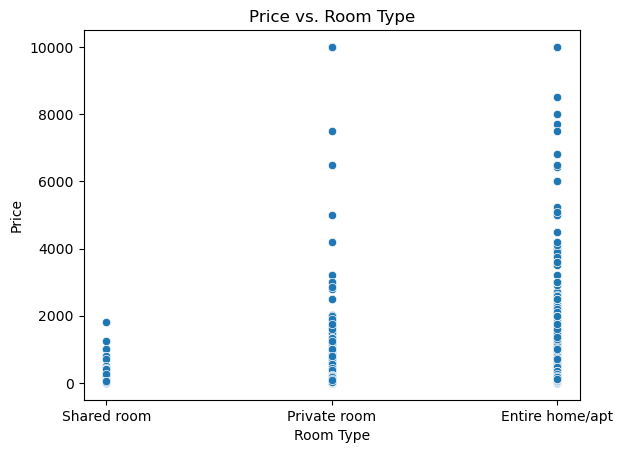

In [707]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# room_type과 price의 관계 시각화
sns.scatterplot(x='room_type', y='price', data=df)

plt.xticks(ticks=[1, 2, 3], labels=['Shared room', 'Private room', 'Entire home/apt'])  # x축 레이블 수정
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price vs. Room Type')
plt.show()

In [708]:
# 'room_type'과 'price' 사이의 상관 계수 계산
correlation = df[['room_type', 'price']].corr()
print(correlation)

           room_type    price
room_type    1.00000  0.24935
price        0.24935  1.00000


예상했던 결과보다 약하지만 양의 상관관계가 있는 것으로 보여짐

**name**
- 가설 : 이름의 길이가 길수록 집에 대한 요소를 어필하는 것이기 때문에 가격과도 상관관계가 있지 않을까?

In [709]:
# name 결측치 빈값으로 대체 후 name의 len로 대체
df['name'] = df['name'].fillna('').apply(len)

In [710]:
# 변경 확인
df['name'].head()

0    34
1    21
2    35
3    31
4    48
Name: name, dtype: int64

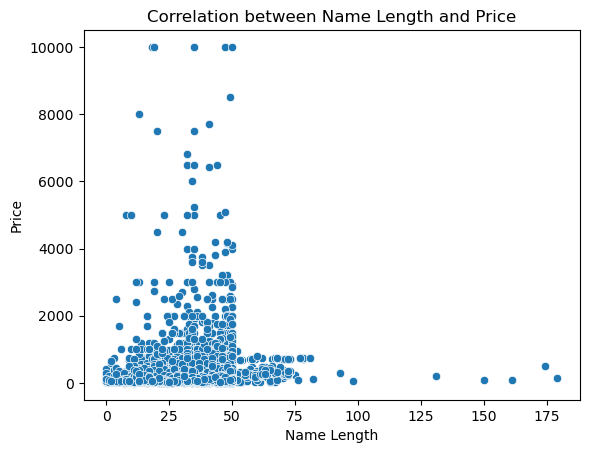

In [711]:
# name_lengh와 price 관계 시각화

# seaborn을 사용하여 상관 관계 시각화
sns.scatterplot(x='name', y='price', data=df)

# matplotlib를 사용한 그래프 세부 설정
plt.title('Correlation between Name Length and Price')
plt.xlabel('Name Length')
plt.ylabel('Price')
plt.show()

In [712]:
# 'name_length'와 'price' 사이의 상관 계수 계산
correlation = df[['name', 'price']].corr()
print(correlation)

           name     price
name   1.000000  0.042197
price  0.042197  1.000000


Graph와 correalation을 확인하였을 때 0.04로 양의 상관관계가 있지만 영향이 적은 것으로 보여짐

**neighbourhood**


In [713]:
#데이터 종류 확인
df['neighbourhood'].value_counts(), df['neighbourhood_group'].value_counts()

(neighbourhood
 Williamsburg          3920
 Bedford-Stuyvesant    3714
 Harlem                2658
 Bushwick              2465
 Upper West Side       1971
                       ... 
 Fort Wadsworth           1
 Richmondtown             1
 New Dorp                 1
 Rossville                1
 Willowbrook              1
 Name: count, Length: 221, dtype: int64,
 neighbourhood_group
 Manhattan        21661
 Brooklyn         20104
 Queens            5666
 Bronx             1091
 Staten Island      373
 Name: count, dtype: int64)

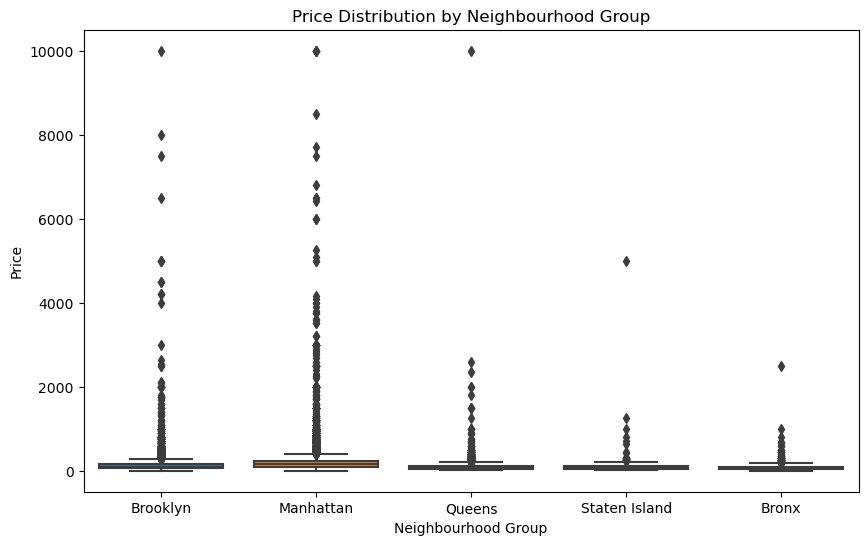

In [714]:
# neighbourhood_group 별 price 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)

plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

price 이상치로 인해 정확한 확인이 어려워 log 씌운 후 재확인

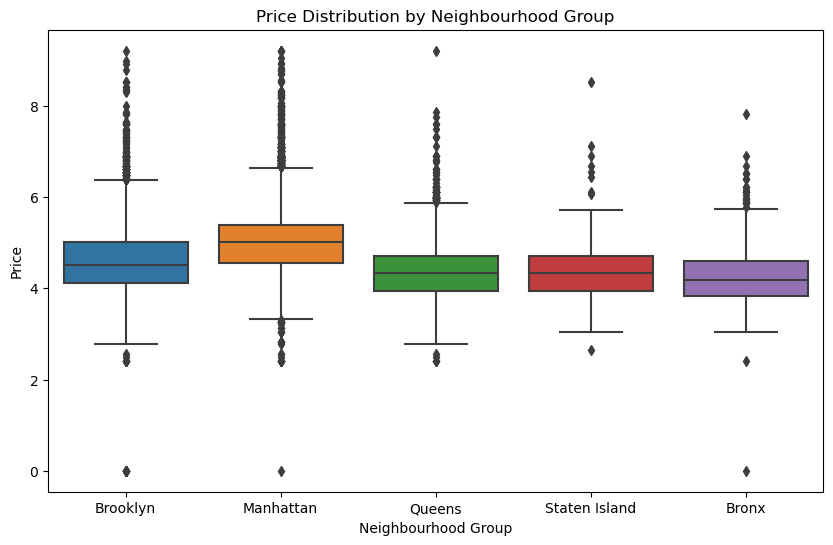

In [715]:
import numpy as np

# price min값이 0으로 데이터에 1을 더한 후 로그 변환 적용
df['log_price'] = np.log(df['price'] + 1)

# 로그 변환된 가격 데이터의 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='log_price', data=df)

plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


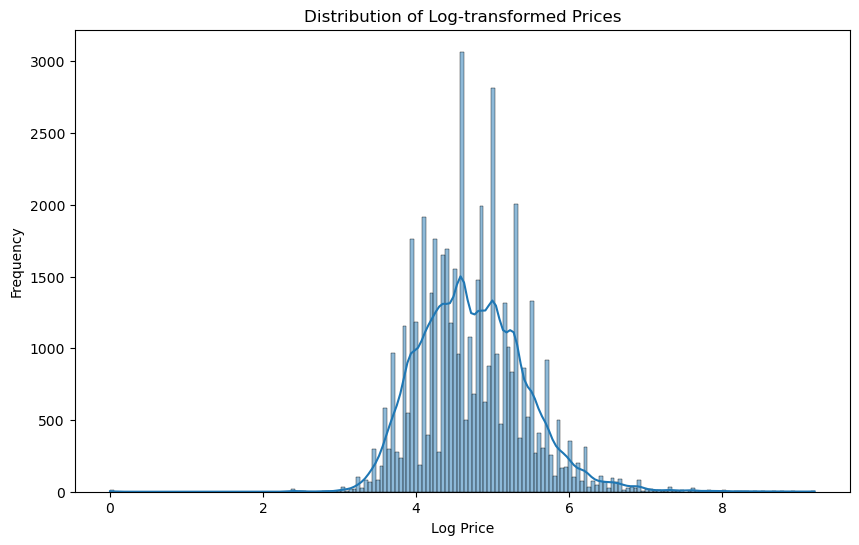

In [716]:
#price log 후 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log-transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

Manhattan > Brooklyn > etc 순으로 높으며 나머지 셋은 비슷한 가격대로 차이가 있는 것으로 보여짐
<br/><br/>
1. neighbourhood_group : 고유값이 4개로 원핫인코딩 진행
2. neighbourhood : 고유값이 221개로 빈도 기반 인코딩을 진행하여 가격과 상관관계가 있는지 확인

In [717]:
# neighbourhood_group의 원-핫 인코딩
df = pd.get_dummies(df, columns=['neighbourhood_group'])

df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,log_price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,34,2787,John,Kensington,40.64749,-73.97237,2,149,1,...,0.21,6,365,262.0,5.010635,False,True,False,False,False
1,2595,21,2845,Jennifer,Midtown,40.75362,-73.98377,3,225,1,...,0.38,2,355,48.0,5.420535,False,False,True,False,False
2,3647,35,4632,Elisabeth,Harlem,40.80902,-73.94190,2,150,3,...,0.00,1,365,50.0,5.017280,False,False,True,False,False
3,3831,31,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,3,89,1,...,4.64,1,194,3.0,4.499810,False,True,False,False,False
4,5022,48,7192,Laura,East Harlem,40.79851,-73.94399,3,80,10,...,0.10,1,0,231.0,4.394449,False,False,True,False,False


In [718]:
# neighbourhood의 빈도 기반 인코딩
neighbourhood_freq = df['neighbourhood'].value_counts().to_dict()
df['neighbourhood_freq'] = df['neighbourhood'].map(neighbourhood_freq)

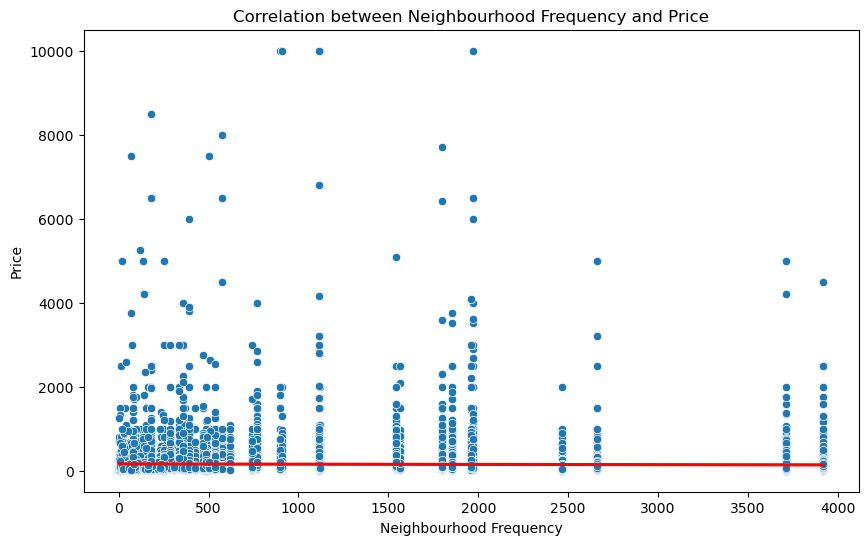

In [719]:
# 산점도 및 선형 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='neighbourhood_freq', y='price', data=df)
sns.regplot(x='neighbourhood_freq', y='price', data=df, scatter=False, color='red')

plt.title('Correlation between Neighbourhood Frequency and Price')
plt.xlabel('Neighbourhood Frequency')
plt.ylabel('Price')
plt.show()

In [720]:
# 'neighbourhood_freq'와 'price' 사이의 상관 계수 계산
correlation = df[['neighbourhood_freq', 'price']].corr()
print(correlation)

                    neighbourhood_freq     price
neighbourhood_freq            1.000000 -0.028721
price                        -0.028721  1.000000


-0.028로 약한 음의 상관관계가 있으며 가성비가 좋은 곳일수록 자주 방문한다는 의미로 추측

**host_id**

In [721]:
# 데이터 종류 확인
df['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

host_id는 중복값이 있는 것으로 확인 <br/>
neighbourhood와 동일하게 host id의 빈도수로 인코딩을 진행 

In [722]:
# host_id 빈도 기반 인코딩
host_id_freq = df['host_id'].value_counts().to_dict()
df['host_id_freq'] = df['host_id'].map(host_id_freq)

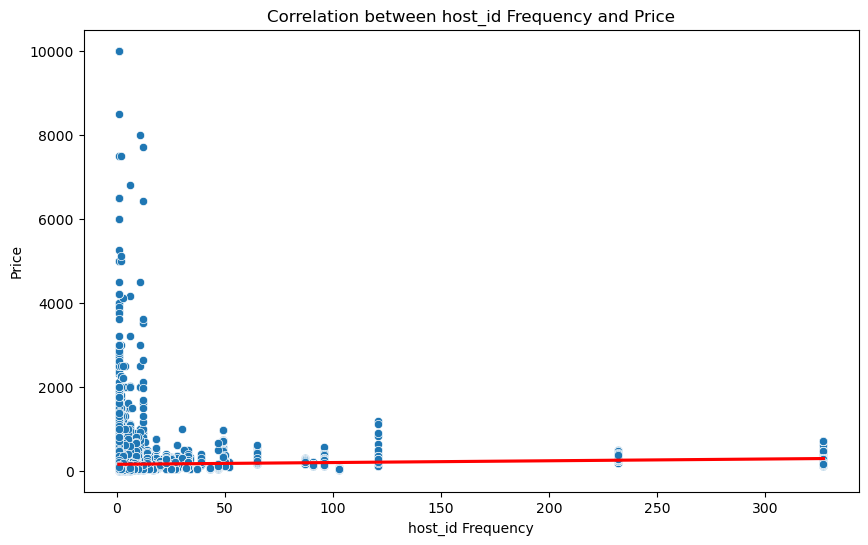

In [723]:
# 산점도 및 선형 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='host_id_freq', y='price', data=df)
sns.regplot(x='host_id_freq', y='price', data=df, scatter=False, color='red')

plt.title('Correlation between host_id Frequency and Price')
plt.xlabel('host_id Frequency')
plt.ylabel('Price')
plt.show()

In [724]:
# 'host_id_freq'와 'price' 사이의 상관 계수 계산
correlation = df[['host_id_freq', 'price']].corr()
print(correlation)

              host_id_freq     price
host_id_freq      1.000000  0.057472
price             0.057472  1.000000


위 neighbourhood_freq와는 반대로 host_id_freq는 price는 약한 양의 상관관계가 있는 것으로 확인 <br/>
지역 외적인 요소가 가격에 더 큰 영향을 준다는 것으로 해석

**latitude, longitude**

가설 : 뉴욕의 타임스퀘어와 가까울수록 가격이 비싸지지 않을까?

In [725]:
# 뉴욕 타임스퀘어 위도,경도
central_latitude = 40.7580
central_longitude = -73.9855

# Haversine 공식을 사용하여 거리 계산
def haversine(lat1, lon1, lat2, lon2):
    # 지구 반지름 (킬로미터 단위)
    R = 6371.0
    
    # 라디안으로 변환
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # 차이 계산
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Haversine 공식
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return distance

# 각 숙소의 중심지점까지의 거리 계산 및 새로운 열 추가
df['distance_to_central'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], central_latitude, central_longitude), axis=1)


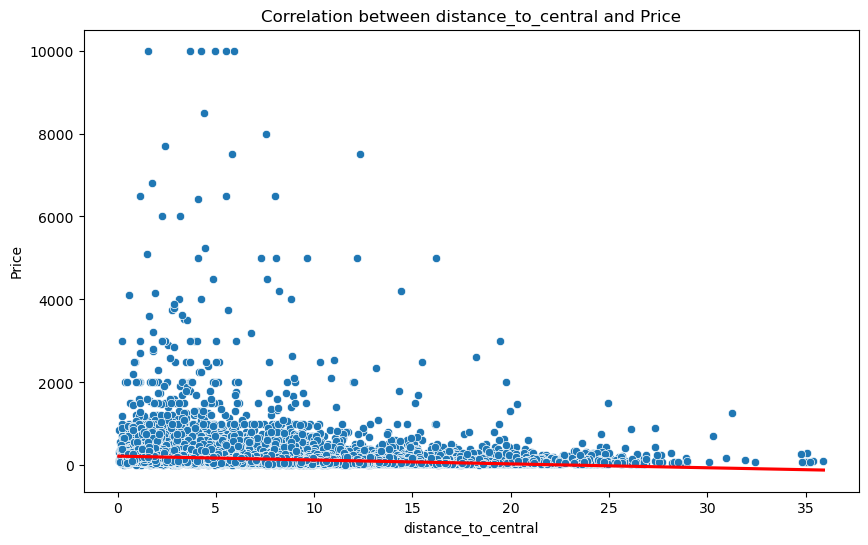

In [726]:
# 산점도 및 선형 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_central', y='price', data=df)
sns.regplot(x='distance_to_central', y='price', data=df, scatter=False, color='red')

plt.title('Correlation between distance_to_central and Price')
plt.xlabel('distance_to_central')
plt.ylabel('Price')
plt.show()

In [727]:
# 'host_id_freq'와 'price' 사이의 상관 계수 계산
correlation = df[['distance_to_central', 'price']].corr()
print(correlation)

                     distance_to_central     price
distance_to_central             1.000000 -0.172664
price                          -0.172664  1.000000


뉴욕의 타임스퀘어와 거리가 멀어질 수록 가격이 저렴해 지는 것으로 보여짐

In [728]:
#scaling을 위해 

#불필요 column 제거
df.drop(columns= ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude','last_review'], inplace=True)

**Scaling**

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   room_type                          48895 non-null  int64  
 1   price                              48895 non-null  int64  
 2   minimum_nights                     48895 non-null  int64  
 3   number_of_reviews                  48895 non-null  int64  
 4   reviews_per_month                  48895 non-null  float64
 5   calculated_host_listings_count     48895 non-null  int64  
 6   availability_365                   48895 non-null  int64  
 7   days_since_last_review             48895 non-null  float64
 8   log_price                          48895 non-null  float64
 9   neighbourhood_group_Bronx          48895 non-null  bool   
 10  neighbourhood_group_Brooklyn       48895 non-null  bool   
 11  neighbourhood_group_Manhattan      48895 non-null  boo

## Modeling

In [730]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# 스케일링을 수행하기 전에 타겟 변수 y를 분리
X = df.drop('price', axis=1)
y = df['price']

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# X 데이터만 스케일링
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2022)

# 결과 확인
print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)

훈련 세트 크기: (39116, 16)
테스트 세트 크기: (9779, 16)


In [731]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

28699.920239134233

In [732]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

28703.202044096368

In [733]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

29468.613286442218

In [734]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

52278.38284903987

In [735]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

58.639098348501875

In [736]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

17341.212576191472

### baseline modeling

In [737]:
#불필요 column 제거
baseline = baseline.select_dtypes(include=['int64', 'float64'])

#null값 제거
baseline = baseline.dropna()

In [738]:
X = baseline.drop('price', axis=1)
y = baseline['price']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

# 결과 확인
print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)

훈련 세트 크기: (31074, 9)
테스트 세트 크기: (7769, 9)


In [739]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

53041.99721781978

In [740]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.03376e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


53039.58529988037

In [741]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

53544.93951525187

In [742]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

54021.84417347614

In [743]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

50136.80969865491

In [744]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

50076.395732801124

# 회고

Airbnb라는 친숙한 데이터로 EDA를 진행하다보니 여러가지 궁금증이 생겨 다양한 시도를 해보기 위해 노력했다. <br/>
feature engineering 전후 결과를 확인하였을 때 확연하게 결과 값이 좋아진 것을 확인할 수 있었다.<br/>
가설과 실제 데이터의 결과의 차이를 확인하고나니 EDA 단계에서 데이터 기반의 의사결정이 중요하다는 것을 다시한번 느낄 수 있었다.<br/>
EDA 단계에서 다양한 시도를 더 해보고 싶었지만 시간 관리가 되지 않아 시도하지 못한 점은 아쉬웠다.